# Short demo on Schwarzschild spacetime

This notebook illustrates a few tensor calculus capabilities of [SageMath](http://www.sagemath.org/) on the example of Schwarzschild spacetime. See the [SageManifolds home page](http://sagemanifolds.obspm.fr/) for more details.


In [1]:
%display latex

First we introduce the spacetime $M$ as a 4-dimensional Lorentzian manifold:

In [2]:
M = Manifold(4, 'M', structure='Lorentzian')

In [3]:
print(M)

4-dimensional Lorentzian manifold M


Then we define the standard Schwarzchild-Droste coordinates $(t,r,\theta,\phi)$ on it, via the method `chart` called on the manifold object `M`:

In [4]:
X.<t, r, th, ph> = M.chart(r"t r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi")

In [5]:
X

Chart (M, (t, r, th, ph))

In [6]:
print(X)

Chart (M, (t, r, th, ph))


In [7]:
X.coord_range()

t: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: (0, 2*pi)

## Metric tensor

The next step is to introduce the metric tensor, which depends on one parameter: the black hole mass $m$; we declare the latter as a symbolic variable, via the command `var`:

In [8]:
m = var('m')
assume(m>0)

In [9]:
g = M.metric()
g[0, 0] = -(1 - 2*m/r)
g[1,1] = 1/(1-2*m/r)
g[2,2] = r^2
g[3,3] = r^2*sin(th)^2

In [10]:
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

Display of the metric components as a matrix:

In [11]:
g[:]

[     2*m/r - 1              0              0              0]
[             0 -1/(2*m/r - 1)              0              0]
[             0              0            r^2              0]
[             0              0              0  r^2*sin(th)^2]

In [12]:
g[0,1]

0

In [13]:
g[1,1]

-1/(2*m/r - 1)

In [14]:
g.display_comp()

g_t,t = 2*m/r - 1 
g_r,r = -1/(2*m/r - 1) 
g_th,th = r^2 
g_ph,ph = r^2*sin(th)^2

In [15]:
print(g)

Lorentzian metric g on the 4-dimensional Lorentzian manifold M


In [16]:
g

Lorentzian metric g on the 4-dimensional Lorentzian manifold M

The nonzero (and nonredundant) Christoffel symbols of $g$ with respect to the default coordinate chart (`X`):

In [17]:
g.christoffel_symbols_display()

Gam^t_t,r = -m/(2*m*r - r^2) 
Gam^r_t,t = -(2*m^2 - m*r)/r^3 
Gam^r_r,r = m/(2*m*r - r^2) 
Gam^r_th,th = 2*m - r 
Gam^r_ph,ph = (2*m - r)*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th)

All the nonzero Christoffel symbols:

In [18]:
g.christoffel_symbols_display(only_nonredundant=False)

Gam^t_t,r = -m/(2*m*r - r^2) 
Gam^t_r,t = -m/(2*m*r - r^2) 
Gam^r_t,t = -(2*m^2 - m*r)/r^3 
Gam^r_r,r = m/(2*m*r - r^2) 
Gam^r_th,th = 2*m - r 
Gam^r_ph,ph = (2*m - r)*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_th,r = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th) 
Gam^ph_ph,r = 1/r 
Gam^ph_ph,th = cos(th)/sin(th)

## Curvature 

The Ricci tensor:

In [19]:
g.ricci()

Field of symmetric bilinear forms Ric(g) on the 4-dimensional Lorentzian manifold M

In [20]:
print(g.ricci())

Field of symmetric bilinear forms Ric(g) on the 4-dimensional Lorentzian manifold M


We check that the Schwarzschild metric is a solution of the vacuum Einstein equation:

In [21]:
g.ricci().display()

Ric(g) = 0

The Riemann tensor:

In [22]:
R = g.riemann()

In [23]:
R.display()

Riem(g) = -2*m/(2*m*r^2 - r^3) d/dt*dr*dt*dr + 2*m/(2*m*r^2 - r^3) d/dt*dr*dr*dt - m/r d/dt*dth*dt*dth + m/r d/dt*dth*dth*dt - m*sin(th)^2/r d/dt*dph*dt*dph + m*sin(th)^2/r d/dt*dph*dph*dt - 2*(2*m^2 - m*r)/r^4 d/dr*dt*dt*dr + 2*(2*m^2 - m*r)/r^4 d/dr*dt*dr*dt - m/r d/dr*dth*dr*dth + m/r d/dr*dth*dth*dr - m*sin(th)^2/r d/dr*dph*dr*dph + m*sin(th)^2/r d/dr*dph*dph*dr + (2*m^2 - m*r)/r^4 d/dth*dt*dt*dth - (2*m^2 - m*r)/r^4 d/dth*dt*dth*dt - m/(2*m*r^2 - r^3) d/dth*dr*dr*dth + m/(2*m*r^2 - r^3) d/dth*dr*dth*dr + 2*m*sin(th)^2/r d/dth*dph*dth*dph - 2*m*sin(th)^2/r d/dth*dph*dph*dth + (2*m^2 - m*r)/r^4 d/dph*dt*dt*dph - (2*m^2 - m*r)/r^4 d/dph*dt*dph*dt - m/(2*m*r^2 - r^3) d/dph*dr*dr*dph + m/(2*m*r^2 - r^3) d/dph*dr*dph*dr - 2*m/r d/dph*dth*dth*dph + 2*m/r d/dph*dth*dph*dth

In [24]:
R.display_comp()

Riem(g)^t_r,t,r = -2*m/(2*m*r^2 - r^3) 
Riem(g)^t_r,r,t = 2*m/(2*m*r^2 - r^3) 
Riem(g)^t_th,t,th = -m/r 
Riem(g)^t_th,th,t = m/r 
Riem(g)^t_ph,t,ph = -m*sin(th)^2/r 
Riem(g)^t_ph,ph,t = m*sin(th)^2/r 
Riem(g)^r_t,t,r = -2*(2*m^2 - m*r)/r^4 
Riem(g)^r_t,r,t = 2*(2*m^2 - m*r)/r^4 
Riem(g)^r_th,r,th = -m/r 
Riem(g)^r_th,th,r = m/r 
Riem(g)^r_ph,r,ph = -m*sin(th)^2/r 
Riem(g)^r_ph,ph,r = m*sin(th)^2/r 
Riem(g)^th_t,t,th = (2*m^2 - m*r)/r^4 
Riem(g)^th_t,th,t = -(2*m^2 - m*r)/r^4 
Riem(g)^th_r,r,th = -m/(2*m*r^2 - r^3) 
Riem(g)^th_r,th,r = m/(2*m*r^2 - r^3) 
Riem(g)^th_ph,th,ph = 2*m*sin(th)^2/r 
Riem(g)^th_ph,ph,th = -2*m*sin(th)^2/r 
Riem(g)^ph_t,t,ph = (2*m^2 - m*r)/r^4 
Riem(g)^ph_t,ph,t = -(2*m^2 - m*r)/r^4 
Riem(g)^ph_r,r,ph = -m/(2*m*r^2 - r^3) 
Riem(g)^ph_r,ph,r = m/(2*m*r^2 - r^3) 
Riem(g)^ph_th,th,ph = -2*m/r 
Riem(g)^ph_th,ph,th = 2*m/r

## Kretschmann scalar

$K = R_{abcd} R^{abcd}$

In [25]:
print(R)

Tensor field Riem(g) of type (1,3) on the 4-dimensional Lorentzian manifold M


In [26]:
dR = R.down(g)

In [27]:
print(dR)

Tensor field of type (0,4) on the 4-dimensional Lorentzian manifold M


In [28]:
uR = R.up(g)

In [29]:
print(uR)

Tensor field of type (4,0) on the 4-dimensional Lorentzian manifold M


In [30]:
K = dR['_{abcd}']*uR['^{abcd}']

In [31]:
K

Scalar field on the 4-dimensional Lorentzian manifold M

In [32]:
K.display()

M --> R
(t, r, th, ph) |--> 48*m^2/r^6

In [33]:
K.expr()

48*m^2/r^6

## A unit timelike vector field

Let us introduce the exterior $E$ of the black hole as an open subset of $M$:

In [34]:
E = M.open_subset('E', coord_def = {X: r>2*m})

On $E$ static observers can exist; their 4-velocity $u$ is

In [35]:
u = E.vector_field(name='u')
u[0] = 1/sqrt(1-2*m/r)
u.display()

u = 1/sqrt(-2*m/r + 1) d/dt

In [36]:
g(u, u)

Scalar field g(u,u) on the Open subset E of the 4-dimensional Lorentzian manifold M

In [37]:
print(g(u,u))

Scalar field g(u,u) on the Open subset E of the 4-dimensional Lorentzian manifold M


In [38]:
g(u,u).display()

g(u,u): E --> R
   (t, r, th, ph) |--> -1

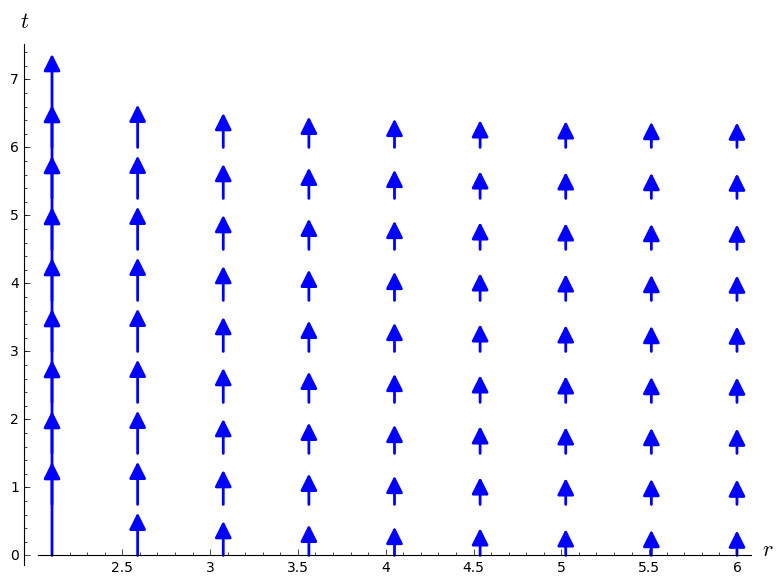

In [39]:
u.plot(ambient_coords=(r,t), fixed_coords={th: pi/2, ph: pi}, 
       ranges={t: (0, 6), r: (2.1, 6)}, parameters={m: 1}, scale=0.3)

## 4-acceleration of static observers

In [40]:
nabla = g.connection()
nabla

Levi-Civita connection nabla_g associated with the Lorentzian metric g on the 4-dimensional Lorentzian manifold M

In [41]:
print(nabla(u))

Tensor field nabla_g(u) of type (1,1) on the Open subset E of the 4-dimensional Lorentzian manifold M


In [42]:
nabla(u).display()

nabla_g(u) = -(2*m^2 - m*r)/(sqrt(-2*m + r)*r^(5/2)) d/dr*dt

The 4-acceleration of static observers is defined by 
$$ a^a = u^b \nabla_b u^a$$
Since the derivative index is the last one (number 1), i.e. $(\nabla u)^a_{\ \, b} = \nabla_b u^a$, we write

In [43]:
a = u.contract(nabla(u), 1)
a.display()

m/r^2 d/dr

An alternative computation of the 4-acceleration using LaTeX-based index notation:

In [44]:
a = u['^b']*nabla(u)['^a_b']
a.display()

m/r^2 d/dr

## Eddington-Finkelstein coordinates

We introduce the Eddington-Finkelstein coordinates $(T,r,\theta,\phi)$ as a second chart on the manifold:

In [45]:
EF.<T, r, th, ph> = M.chart(r"T r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi")

In [46]:
EF

Chart (M, (T, r, th, ph))

The transformation from Schwarzschild-Droste coordinates (chart `X`) to Eddington-Finkelstein ones (chart `EF`) is

In [47]:
X_to_EF = X.transition_map(EF, [t +2*m*ln(abs(r/(2*m)-1)), r, th, ph])

In [48]:
X_to_EF.display()

T = 2*m*log(abs(1/2*r/m - 1)) + t
r = r
th = th
ph = ph

In [49]:
X_to_EF.inverse().display()

t = -2*m*log(1/2*abs(-2*m + r)/m) + T
r = r
th = th
ph = ph

In [50]:
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [51]:
g.display(EF.frame())

g = (2*m - r)/r dT*dT + 2*m/r dT*dr + 2*m/r dr*dT + (2*m + r)/r dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [52]:
g[EF.frame(),:]

[  (2*m - r)/r         2*m/r             0             0]
[        2*m/r   (2*m + r)/r             0             0]
[            0             0           r^2             0]
[            0             0             0 r^2*sin(th)^2]

At this stage, three charts have been introduced on the manifold:

In [53]:
M.atlas()

[Chart (M, (t, r, th, ph)),
 Chart (E, (t, r, th, ph)),
 Chart (M, (T, r, th, ph))]

# Going further

Visit the black hole section of [SageManifolds examples page](http://sagemanifolds.obspm.fr/examples.html). 

